In [1]:
import math
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

1

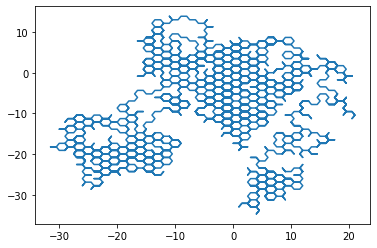

In [2]:
#Proba de transitions dans Q=[q_0,0 q_0,1 q_0,2 ; q_1,0 q_1,1 q_1,2]
#couleur = 1 pour blanc et -1 pour noir
def saut_graphene(Q, couleur):
    alea=rd.random()
    if couleur==1:
        if alea<Q[0,0]:
            k=0
        elif alea<Q[0,0]+Q[0,1]:
            k=1
        else:
            k=2
    else:
        if alea<Q[1,0]:
            k=0
        elif alea<Q[1,0]+Q[1,1]:
            k=1
        else:
            k=2
    return (couleur*math.cos(2*k*math.pi/3),couleur*math.sin(2*k*math.pi/3))

#Marche sur le graphène 2D jusqu'au temps n
#Probas de transitions décrites dans Q
#Longueur d'arête a
def marche_graphene(Q, a, n):
    listeX=[0]
    listeY=[0]
    couleur=1
    for i in range(n):
        saut=saut_graphene(Q,couleur)
        listeX.append(listeX[i]+saut[0])
        listeY.append(listeY[i]+saut[1])
        couleur=-couleur
    return listeX,listeY


#Quelques lignes de test
def test_graphene():
    Q=np.array([[1/3, 1/3, 1/3],[1/3,1/3,1/3]])
    test=marche_graphene(Q,1,4000)
    plt.plot(test[0],test[1])
    return 1

test_graphene()

C:\Users\monte\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\monte\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


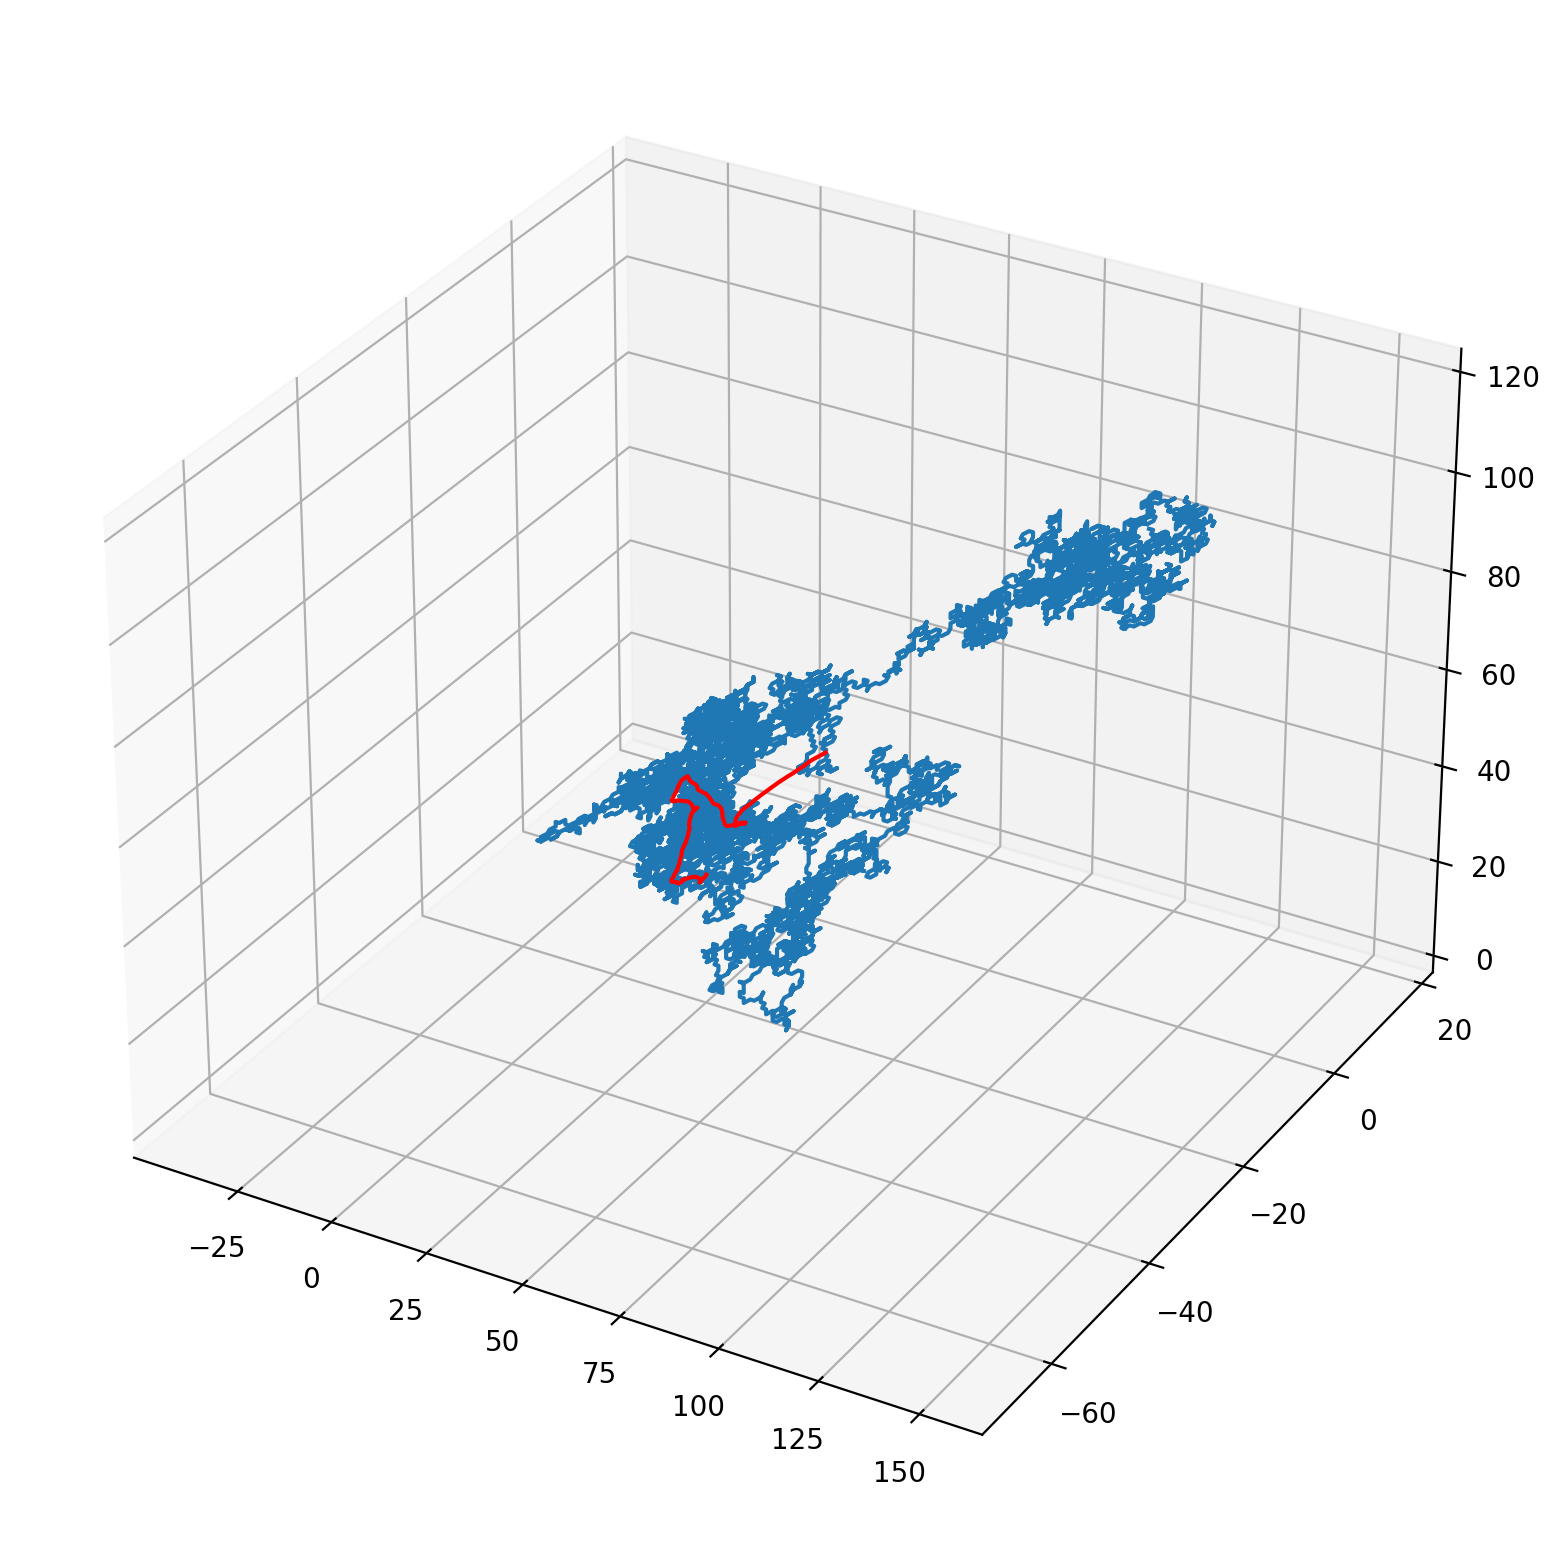

In [3]:
#Probas de transitions horizontales Q=[q_0,0 q_0,1 q_0,2 ; q_1,0 q_1,1 q_1,2] et verticale p
#couleur = 1 pour blanc et -1 pour noir
def saut_graphite(Q, p, alpha, couleur):
    alea=rd.random()
    if alea<alpha*p:
        saut=(0,0,1,couleur)
    elif alea<p:
        saut=(0,0,-1,couleur)
    else:
        alea=(alea-p)/(1-p)
        if couleur==1:
            if alea<Q[0,0]:
                k=0
            elif alea<Q[0,0]+Q[0,1]:
                k=1
            else:
                k=2
        else:
            if alea<Q[1,0]:
                k=0
            elif alea<Q[1,0]+Q[1,1]:
                k=1
            else:
                k=2
        saut=(couleur*math.cos(2*k*math.pi/3),couleur*math.sin(2*k*math.pi/3),0,-couleur)
    return saut

#Marche sur le graphite 3D (empilement parallèle)
#jusqu'au temps n
#Probas de transitions décrites dans Q et p
#Longueur d'arête a et hauteur intercouche h
def marche_graphite(Q, p, alpha, a, h, n):
    listeX=[0]
    listeY=[0]
    listeZ=[0]
    couleur=1
    for i in range(n):
        saut=saut_graphite(Q,p,alpha,couleur)
        listeX.append(listeX[i]+a*saut[0])
        listeY.append(listeY[i]+a*saut[1])
        listeZ.append(listeZ[i]+h*saut[2])
        couleur=saut[3]
    return listeX,listeY,listeZ

def centre_de_masse(positions):
    listeX = [positions[0][0]]
    listeY = [positions[1][0]]
    listeZ = [positions[2][0]]
    n = len(positions[0])
    for i in range(n-1):
        listeX.append(np.mean(positions[0][1:i+1]))
        listeY.append(np.mean(positions[1][1:i+1]))
        listeZ.append(np.mean(positions[2][1:i+1]))
    return listeX,listeY,listeZ


#Quelques lignes de test
def test_graphite():
    Q=np.array([[0.34,0.34,0.32],[0.32,0.34,0.34]])
    p=0.2
    alpha=0.52
    a=1
    h=1
    n=10000
    marche=marche_graphite(Q,p,alpha,a,h,n)
    centre=centre_de_masse(marche)
    return marche, centre



plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['figure.dpi'] =  200



test=test_graphite()
ax = plt.axes(projection='3d')
zline = test[0][2]
xline = test[0][0]
yline = test[0][1]
ax.plot3D(xline, yline, zline)
czline = test[1][2]
cxline = test[1][0]
cyline = test[1][1]
ax.plot3D(cxline, cyline, czline, 'red')
plt.show()

1

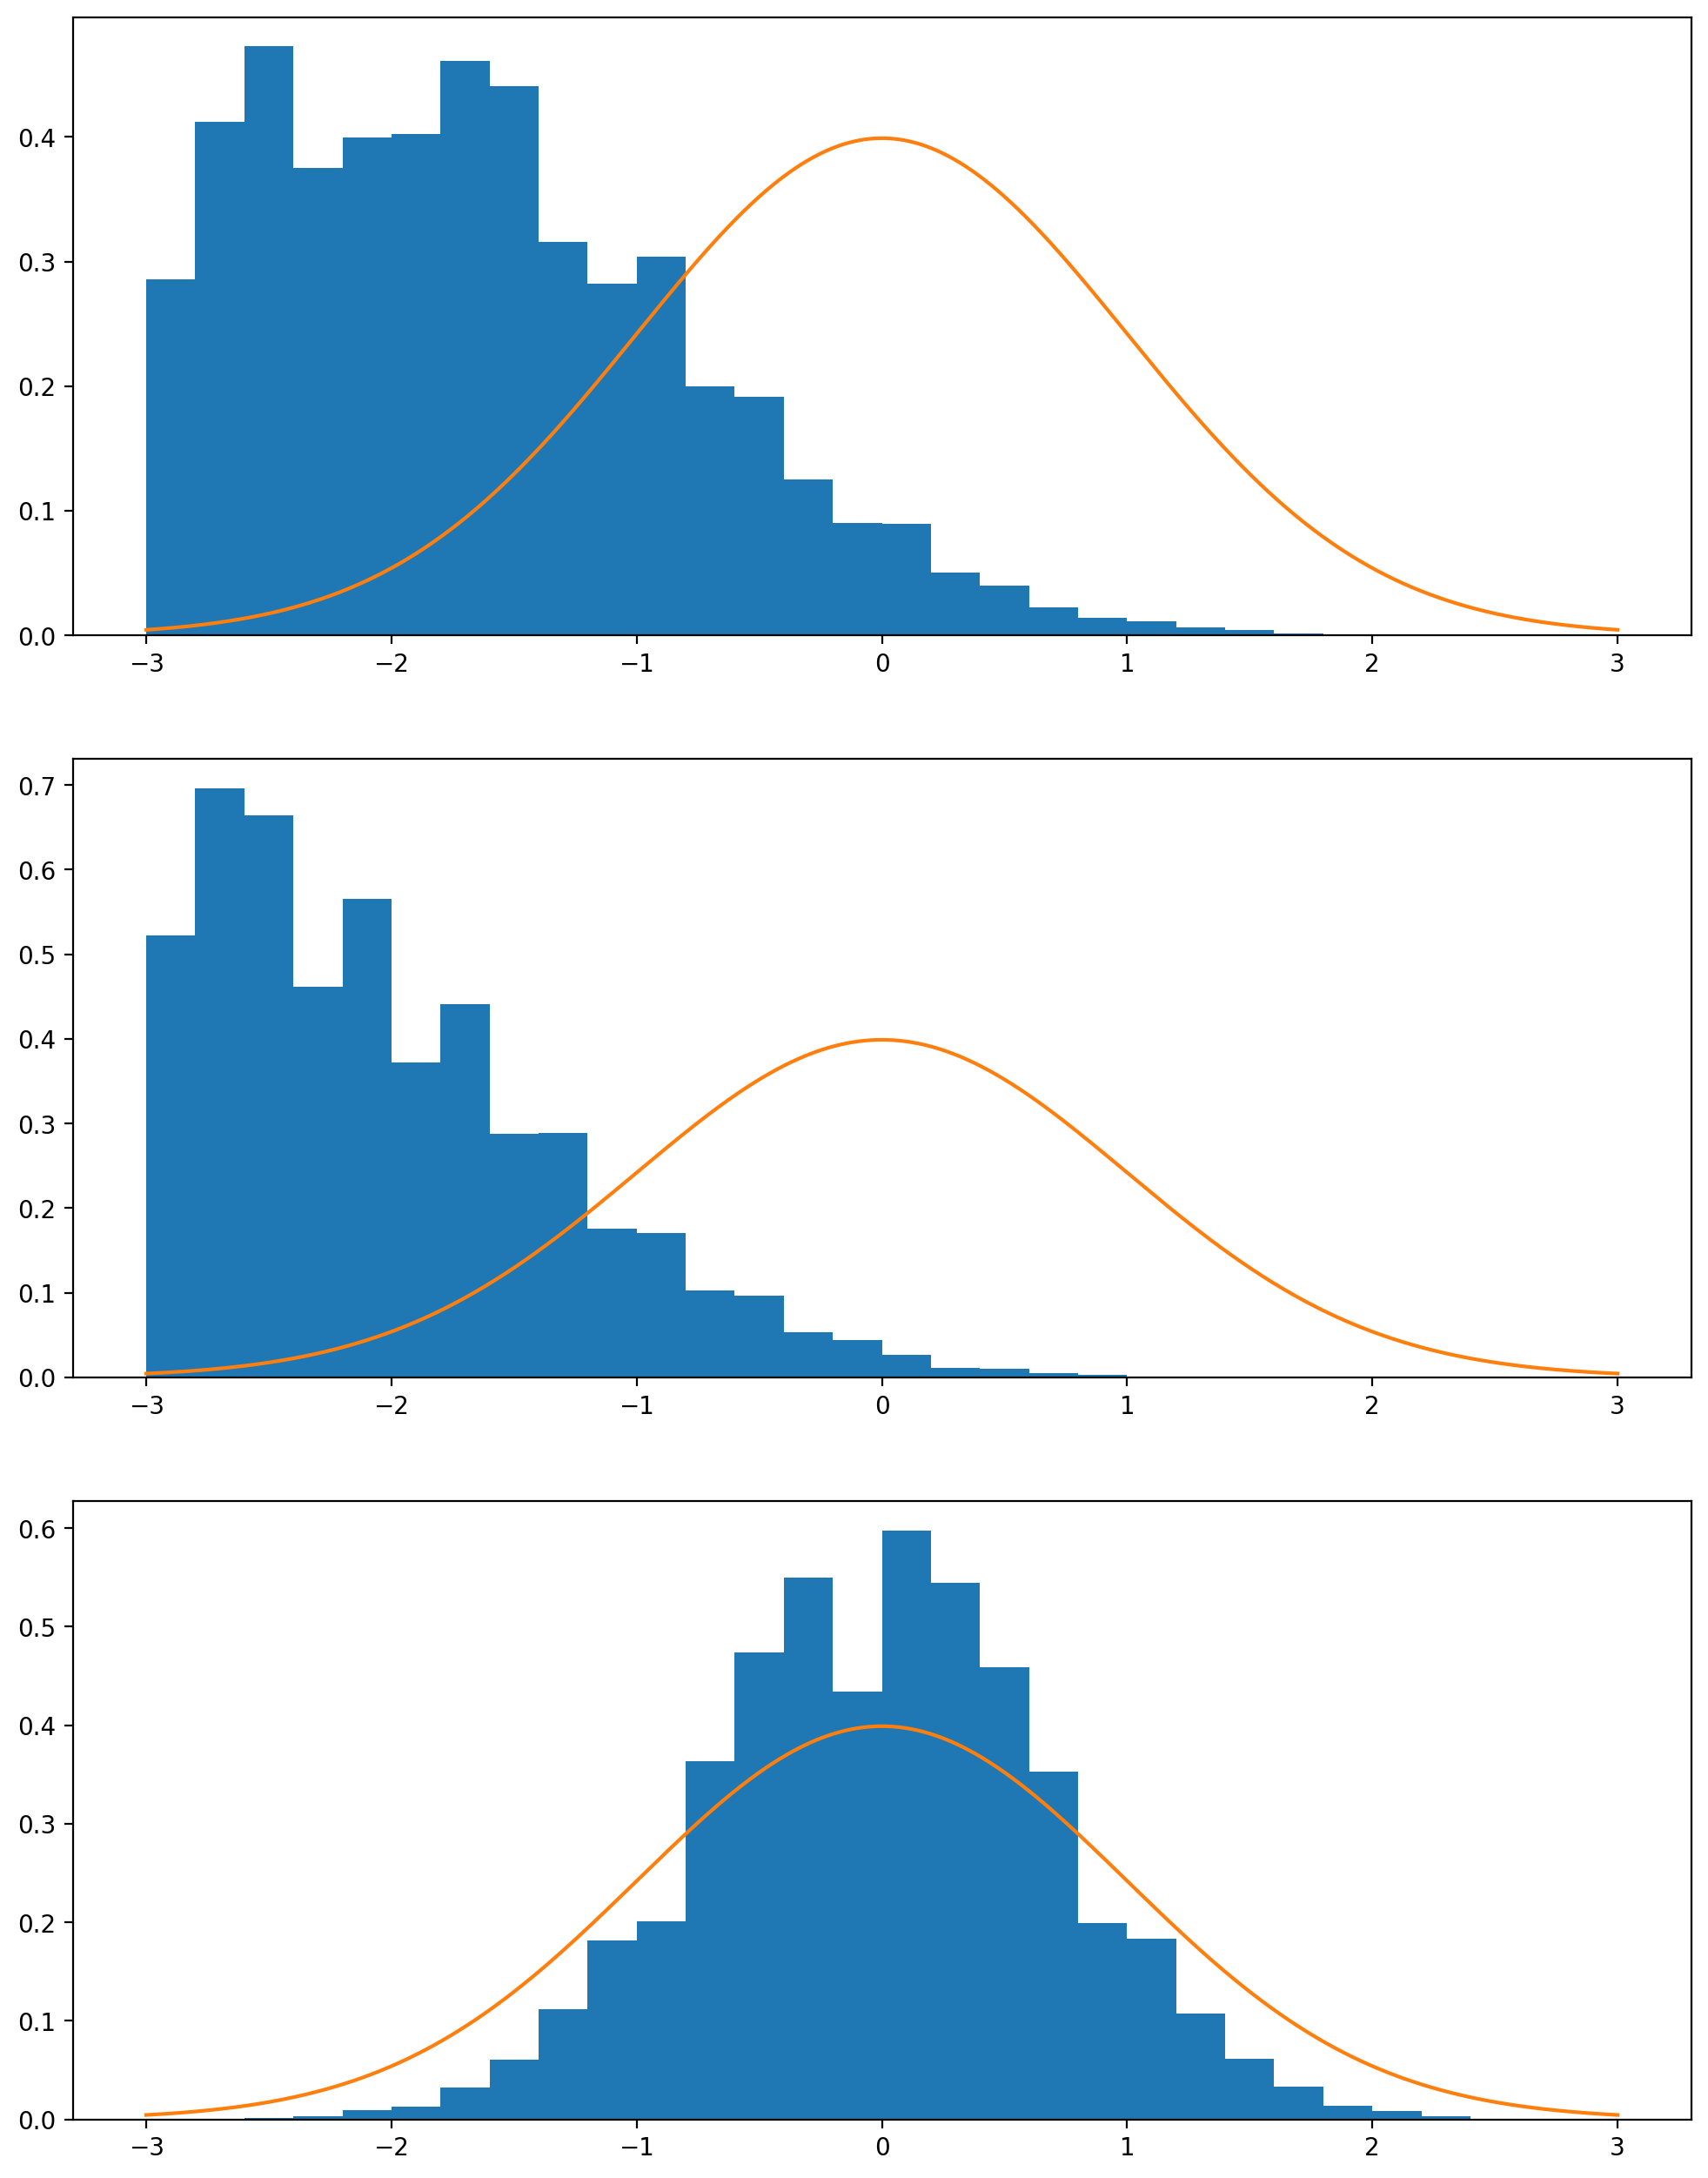

In [4]:

#Normalité asymptotique
def normal_graphite(Q, p, a, h, n, N):
    echantX=[]
    echantY=[]
    echantZ=[]
    mu1=3/4*a*(Q[1,1]+Q[1,2]-Q[0,1]-Q[0,2])
    mu2=math.sqrt(3)/4*a*(Q[0,1]+Q[1,2]-Q[1,1]-Q[0,2])
    sigma1=(1-2*p)*9/8*a**2*((Q[0,1]+Q[0,2])-(Q[0,1]+Q[0,2])**2+(Q[1,1]+Q[1,2])-(Q[1,1]+Q[1,2])**2)+2*p*(1-2*p)*mu1**2
    sigma2=(1-2*p)*3/8*a**2*((Q[0,1]+Q[0,2])-(Q[0,1]-Q[0,2])**2+(Q[1,1]+Q[1,2])-(Q[1,1]-Q[1,2])**2)+2*p*(1-2*p)*mu2**2
    sigma3=2*p*h**2
    #print(sigma1, sigma2, sigma3)
    for i in range(N):
        S=marche_graphite(Q,p,0.5,a,h,n)
        echantX.append((S[0][n]-mu1*n*(1-2*p))/math.sqrt(n*sigma1))
        echantY.append((S[1][n]-mu2*n*(1-2*p))/math.sqrt(n*sigma2))
        echantZ.append(S[2][n]/math.sqrt(n*sigma3))
    
    
    Xgauss=np.linspace(-3,3,1000)
    Ygauss=[]
    for i in range(1000):
        Ygauss.append(math.exp(-Xgauss[i]**2/2)/math.sqrt(2*math.pi))
    
    plt.figure(figsize=(12,16))
    
    plt.subplot(311)
    plt.hist(echantX, range = (-3, 3), bins = 30, density = True)
    plt.plot(Xgauss,Ygauss)
    
    plt.subplot(312)
    plt.hist(echantY, range = (-3, 3), bins = 30, density = True)
    plt.plot(Xgauss,Ygauss)
    plt.subplot(313)
    
    plt.hist(echantZ, range = (-3, 3), bins = 30, density = True)
    plt.plot(Xgauss,Ygauss)
    return 1



def test_normalite():
    Q=np.array([[1/4, 1/4, 1/2],[0.5,0.4,0.1]])
    p=0.2
    a=1
    h=1
    n=900
    N=50000
    normal_graphite(Q,p,a,h,n,N)
    return 1

test_normalite()

1

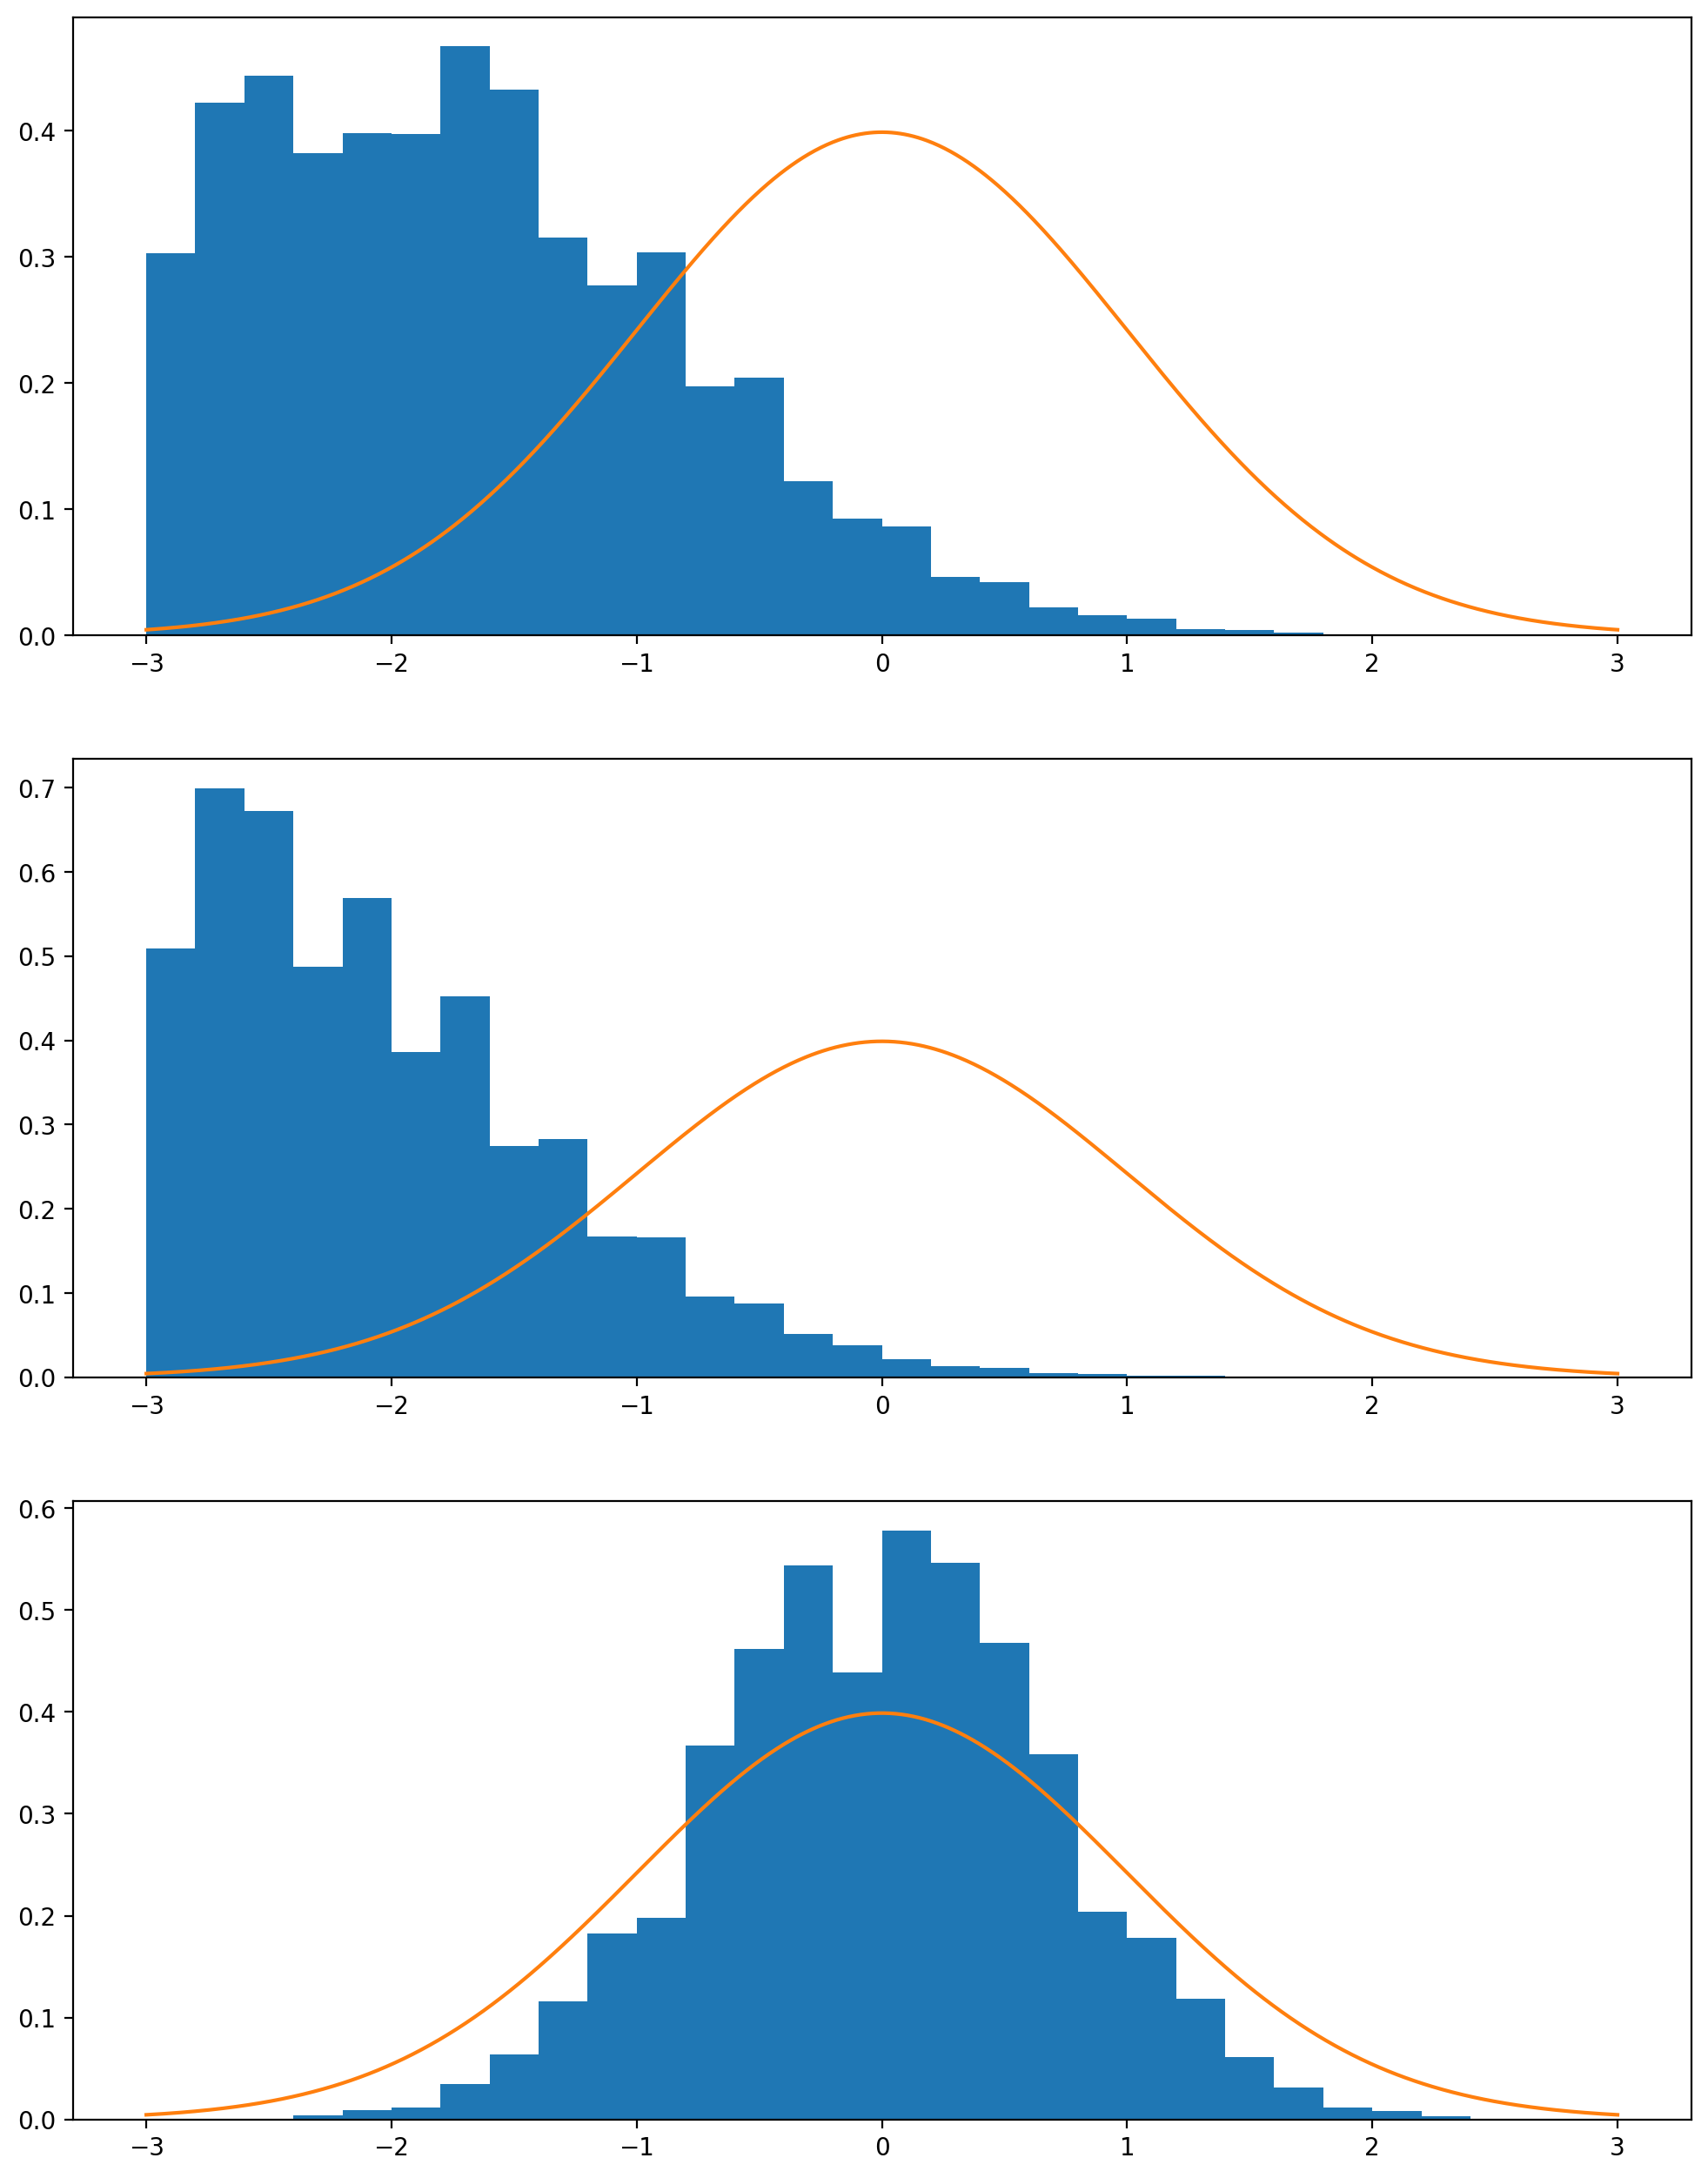

In [5]:

#Covariance asymptotique
def normal_graphite_covar(Q, p, a, h, n, N):
    echantX=[]
    echantY=[]
    echantZ=[]
    mu1=3/4*a*(Q[1,1]+Q[1,2]-Q[0,1]-Q[0,2])
    mu2=math.sqrt(3)/4*a*(Q[0,1]+Q[1,2]-Q[1,1]-Q[0,2])
    sigma12=(1-2*p)*3*math.sqrt(3)/8*a**2*(Q[0,1]*(Q[0,1]-1)+Q[0,2]*(1-Q[0,2])-Q[1,1]*(1-Q[1,1])+Q[1,2]*(1-Q[1,2]))+2*p*(1-2*p)*mu1*mu2
    

    for i in range(N):
        S=marche_graphite(Q,p,a,h,n)
        echantX.append((S[0][n]-mu1*n*(1-2*p))/math.sqrt(n))
        echantY.append((S[1][n]-mu2*n*(1-2*p))/math.sqrt(n))
        echantZ.append(S[2][n]/math.sqrt(n))
    
    
    covXY=[]
    covXZ=[]
    covYZ=[]
    for i in range(N):
        covXY.append(echantX[i]*echantY[i]/math.sqrt(sigma12))
        covXZ.append(echantX[i]*echantZ[i])
        covYZ.append(echantY[i]*echantZ[i])
        
        
    Xgauss=np.linspace(-3,3,1000)
    Ygauss=[]
    for i in range(1000):
        Ygauss.append(math.exp(-Xgauss[i]**2/2)/math.sqrt(2*math.pi))
    
    plt.figure(figsize=(12,16))
    
    plt.subplot(311)
    plt.hist(covXY, range = (-3, 3), bins = 20, normed = True)
    plt.plot(Xgauss,Ygauss)
    
    plt.subplot(312)
    plt.hist(covXZ, range = (-3, 3), bins = 20, normed = True)
    plt.plot(Xgauss,Ygauss)
    plt.subplot(313)
    
    plt.hist(covYZ, range = (-3, 3), bins = 20, normed = True)
    plt.plot(Xgauss,Ygauss)
    return 1



def test_normalite():
    Q=np.array([[1/4, 1/4, 1/2],[0.5,0.4,0.1]])
    p=0.2
    a=1
    h=1
    n=900
    N=50000
    normal_graphite(Q,p,a,h,n,N)
    return 1

test_normalite()

C:\Users\monte\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\monte\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


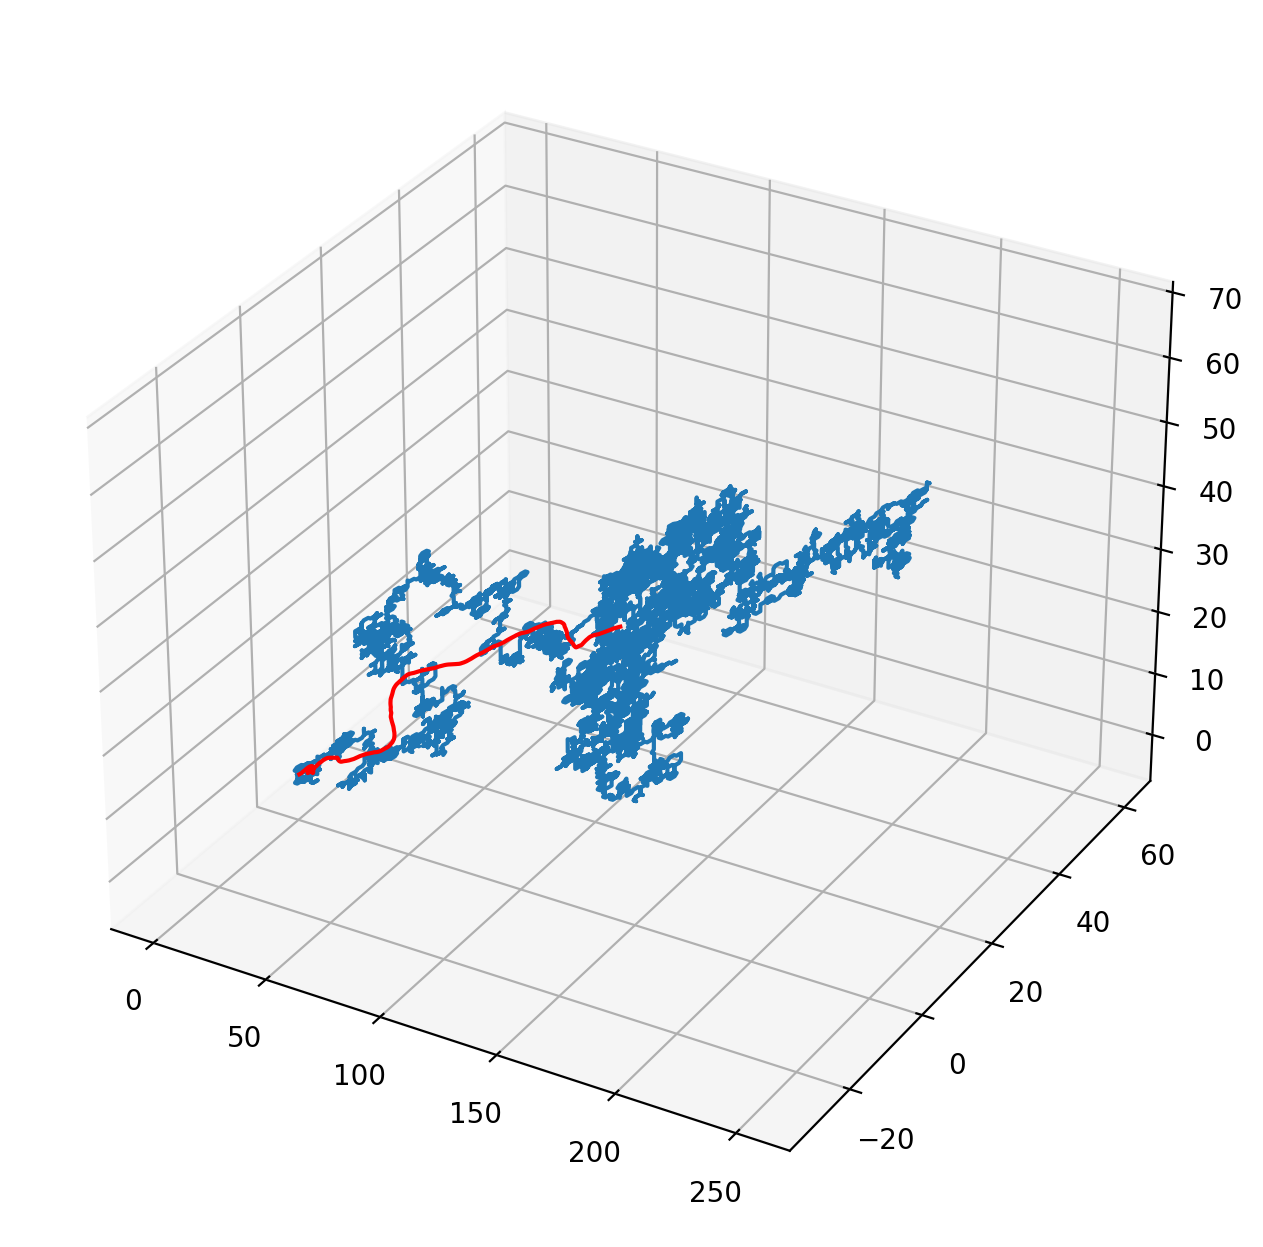

In [6]:
def jump(Q, blanc, vert):
    if blanc == True:
        e = 0
    else:
        e = 1
    alea=rd.random()
    if (vert == True) & (alea < Q[2][2]):
        if alea < Q[2][0]:
            saut = np.array([0, 0, 1])
        else:
            saut = np.array([0, 0, -1])
    else:
        if vert == True:
            alea = (alea-Q[2][2])/(1-Q[2][2])
        vert = not vert
        if alea < Q[e][0] :
            saut = np.array([-2*e+1, 0, 0])
        elif alea < Q[e][0] + Q[e][1]:
            saut = np.array([e-0.5, math.sqrt(3)*(0.5-e), 0])
        else:
            saut = np.array([e-0.5, math.sqrt(3)*(e-0.5), 0])
    return (saut, not blanc, vert)


def marche_graphite_complique(Q, a, h, n):
    listeX=[0]
    listeY=[0]
    listeZ=[0]
    blanc=True
    vert=True
    for i in range(n):
        saut=jump(Q,blanc,vert)
        listeX.append(listeX[i]+a*saut[0][0])
        listeY.append(listeY[i]+a*saut[0][1])
        listeZ.append(listeZ[i]+h*saut[0][2])
        blanc=saut[1]
        vert=saut[2]
    return listeX,listeY,listeZ

      

#Quelques lignes de test
def test_graphite_complique():
    Q=[[0.34, 0.34, 0.32], [0.32, 0.34, 0.34], [0.104, 0.096, 0.2]]
    a=1
    h=1
    n=10000
    test = marche_graphite_complique(Q, a, h, n)
    centre = centre_de_masse(test)
    return test, centre






plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] =  200



test=test_graphite_complique()
ax = plt.axes(projection='3d')
zline = test[0][2]
xline = test[0][0]
yline = test[0][1]
ax.plot3D(xline, yline, zline)
czline = test[1][2]
cxline = test[1][0]
cyline = test[1][1]
ax.plot3D(cxline, cyline, czline, 'red')
plt.show()

1

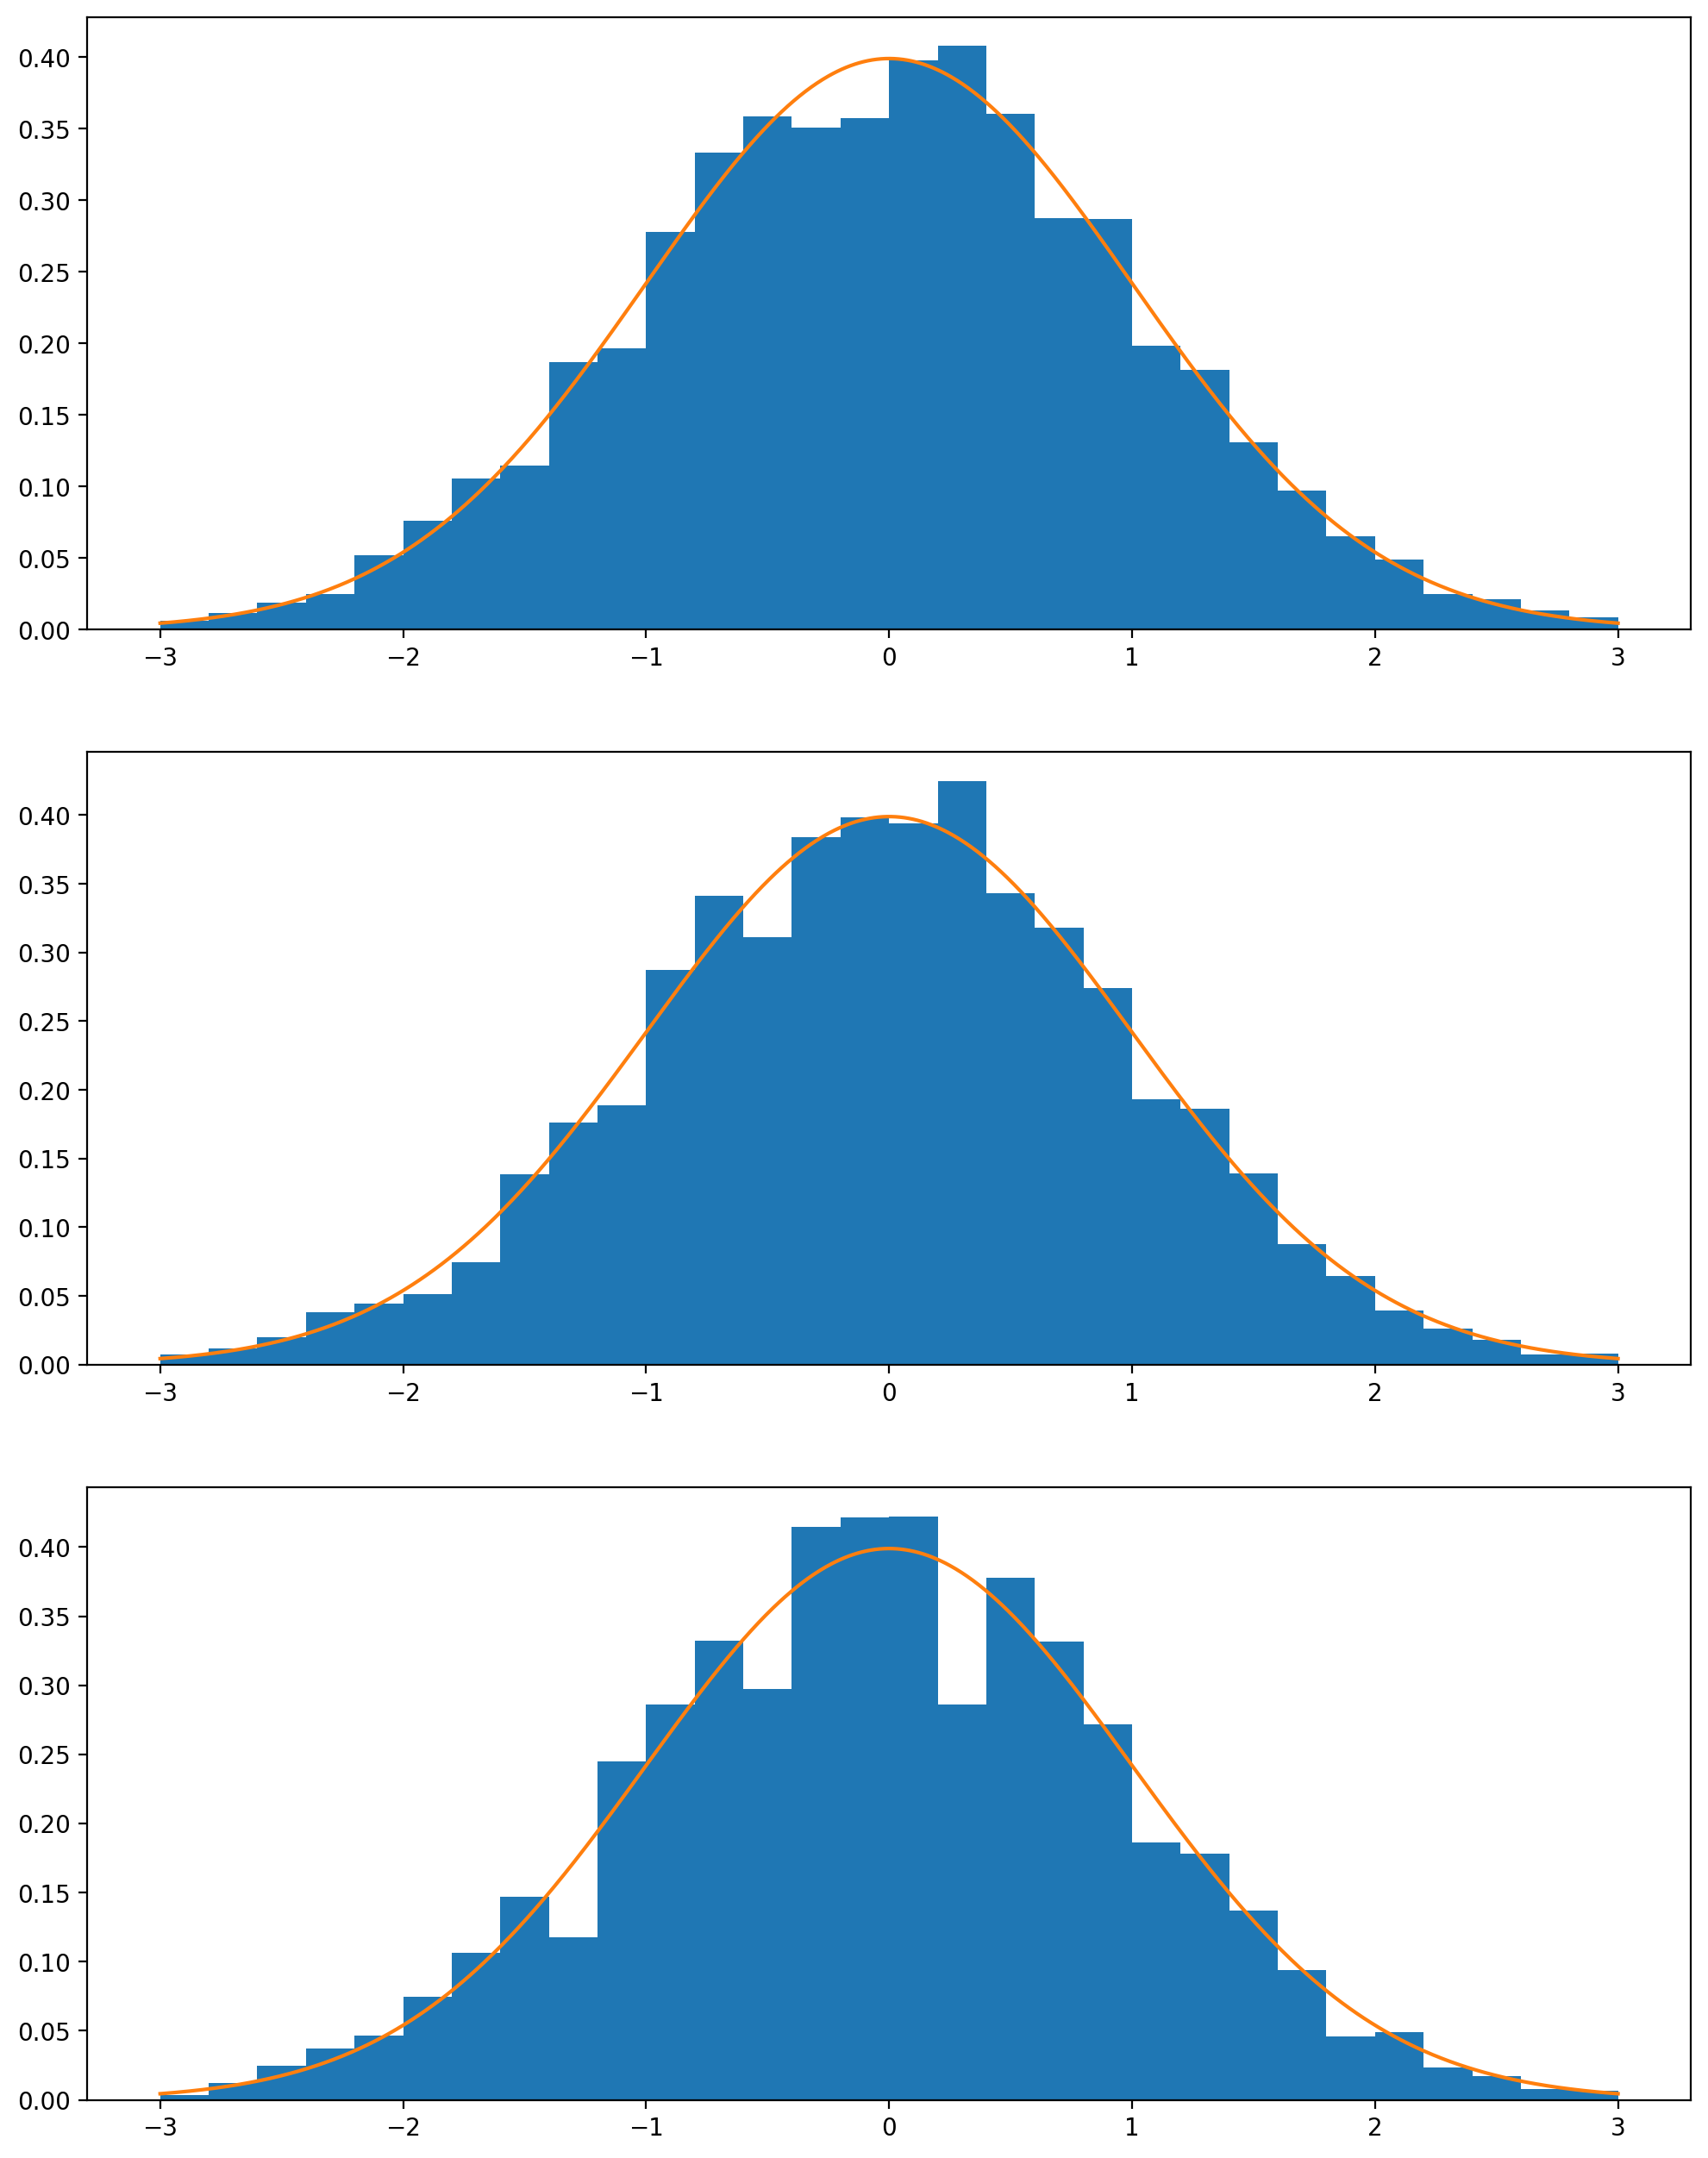

In [7]:
def calculMuThetaSigma(Q, a, h):
    mu=[3*a/4*((Q[1][1]+Q[1][2])-(Q[0][1]+Q[0][2])), math.sqrt(3)*a/4*((Q[0][1]-Q[0][2])-(Q[1][1]-Q[1][2])), h*(Q[2][0]-Q[2][1])]
    if Q[2][2]==0:
        mu[2]=0
    else:
        mu[2]=mu[2]/Q[2][2]
    theta=[a-3*a/4*((Q[1][1]+Q[1][2])+(Q[0][1]+Q[0][2])), math.sqrt(3)*a/4*((Q[0][1]-Q[0][2])+(Q[1][1]-Q[1][2]))]
    sigma=[9*a**2/8*((Q[0][1]+Q[0][2])-(Q[0][1]+Q[0][2])**2+(Q[1][1]+Q[1][2])-(Q[1][1]+Q[1][2])**2), 3*a**2/8*((Q[0][1]+Q[0][2])-(Q[0][1]-Q[0][2])**2+(Q[1][1]+Q[1][2])-(Q[1][1]-Q[1][2])**2), 3*math.sqrt(3)*a**2/8*(Q[0][1]*(Q[0][1]-1)+Q[0][2]*(1-Q[0][2])-Q[1][1]*(1-Q[1][1])+Q[1][2]*(1-Q[1][2]))]
    return (mu, theta, sigma)

def MpuisMMT(p,mu):
    m=[(1-p)/(2-p)*2*mu[0], (1-p)/(2-p)*2*mu[1], p/(2-p)*mu[2]]
    mmT=[[m[0]**2, m[0]*m[1], m[0]*m[2]], [m[0]*m[1], m[1]**2, m[1]*m[2]], [m[0]*m[2], m[2]*m[1], m[2]**2]]
    return (m,mmT)

def MatriceVCFinalForm(Q,a,h):
    p=Q[2][2]
    (mu, theta, sigma)=calculMuThetaSigma(Q, a, h)
    c1=1-p/(2-p)
    c2=4*p*(1-p)/(2-p)**3
    c3=8*(1-p)**3/(2-p)**3
    c4=2*p/(2-p)*c1
    sigma3=h**2-mu[2]**2
    res=[[c1*sigma[0]+c2*mu[0]**2+c3*theta[0]**2, c1*sigma[2]+c2*mu[0]*mu[1]+c3*theta[0]*theta[1], -c2*mu[0]*mu[2]], [c1*sigma[2]+c2*mu[0]*mu[1]+c3*theta[0]*theta[1],c1*sigma[1]+c2*mu[1]**2+c3*theta[1]**2, -c2*mu[1]*mu[2]], [-c2*mu[0]*mu[2], -c2*mu[1]*mu[2], (1-c1)*sigma3+c2*mu[2]**2]]
    return res

#Normalité asymptotique
def normal_graphite_complique(Q, a, h, n, N):
    echantX=[]
    echantY=[]
    echantZ=[]
    (mu, theta, sigma)=calculMuThetaSigma(Q, a, h)
    (m,mmT)= MpuisMMT(Q[2][2],mu)
    MatVC=MatriceVCFinalForm(Q,a,h)
    
    for i in range(N):
        S=marche_graphite_complique(Q,a,h,n)
        echantX.append((S[0][n]-m[0]*n)/math.sqrt(n*MatVC[0][0]))
        echantY.append((S[1][n]-m[1]*n)/math.sqrt(n*MatVC[1][1]))
        echantZ.append((S[2][n]-m[2]*n)/math.sqrt(n*MatVC[2][2]))
    
    
    Xgauss=np.linspace(-3,3,1000)
    Ygauss=[]
    for i in range(1000):
        Ygauss.append(math.exp(-Xgauss[i]**2/2)/math.sqrt(2*math.pi))
    
    plt.figure(figsize=(12,16))
    
    plt.subplot(311)
    plt.hist(echantX, range = (-3, 3), bins = 30, density = True)
    plt.plot(Xgauss,Ygauss)
    
    plt.subplot(312)
    plt.hist(echantY, range = (-3, 3), bins = 30, density = True)
    plt.plot(Xgauss,Ygauss)
    plt.subplot(313)
    
    plt.hist(echantZ, range = (-3, 3), bins = 30, density = True)
    plt.plot(Xgauss,Ygauss)
    return 1



def test_normalite():
    Q=[[1./3., 1./3., 1./3.], [1./3., 1./3., 1./3.], [0.1, 0.2, 0.3]]
    a=1
    h=1
    n=2000
    N=10000
    normal_graphite_complique(Q, a, h, n, N)
    return 1

test_normalite()